In [2]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2007_1.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2007_2.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2008_1.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2008_2.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2009_1.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2009_2.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2010_1.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2010_2.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2011_1.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2011_2.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2012_1.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2012_2.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\BO_2013_1.csv
C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sklearn as sk
import seaborn as sns
import datetime
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#Reading the data
rdo_1 = pd.read_csv("C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\RDO_1.csv", low_memory = False)
rdo_2 = pd.read_csv("C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\RDO_2.csv", low_memory = False)
rdo_3 = pd.read_csv("C:/Users/monik/OneDrive/Desktop/TARP/Crime PROJECT/Dataset\RDO_3.csv", low_memory = False)

#dropping extra column
rdo_1.drop('Unnamed: 30', axis = 1, inplace = True)
rdo_2.drop('Unnamed: 30', axis = 1, inplace = True)
rdo_3.drop('Unnamed: 30', axis = 1, inplace = True)

print (rdo_1.shape)
print (rdo_1.columns)
print (rdo_1.dtypes)

print (rdo_2.shape)
print (rdo_2.columns)
print (rdo_2.dtypes)

print (rdo_3.shape)
print (rdo_3.columns)
print (rdo_3.dtypes)

(793050, 30)
Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'CIDADE', 'ANO_BO', 'NUM_BO', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC',
       'DESCR_TIPO_BO', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_COMUNICACAO_BO', 'FLAG_STATUS', 'RUBRICA', 'DESCR_CONDUTA',
       'DESDOBRAMENTO', 'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'DESCR_TIPO_PESSOA',
       'FLAG_VITIMA_FATAL', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CUTIS'],
      dtype='object')
ID_DELEGACIA                 int64
NOME_DEPARTAMENTO           object
NOME_SECCIONAL              object
NOME_DELEGACIA              object
CIDADE                      object
ANO_BO                       int64
NUM_BO                       int64
NOME_DEPARTAMENTO_CIRC      object
NOME_SECCIONAL_CIRC         object
NOME_DELEGACIA_CIRC         object
NOME_MUNICIPIO_CIRC      

# Cleaning of the Data

In [5]:
frames = [rdo_1, rdo_2, rdo_3]

data = pd.concat(frames, ignore_index=True)

print (data.shape)
print (data.columns)
print (data.dtypes)

(2395054, 30)
Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'CIDADE', 'ANO_BO', 'NUM_BO', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC',
       'DESCR_TIPO_BO', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_COMUNICACAO_BO', 'FLAG_STATUS', 'RUBRICA', 'DESCR_CONDUTA',
       'DESDOBRAMENTO', 'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'DESCR_TIPO_PESSOA',
       'FLAG_VITIMA_FATAL', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CUTIS'],
      dtype='object')
ID_DELEGACIA                 int64
NOME_DEPARTAMENTO           object
NOME_SECCIONAL              object
NOME_DELEGACIA              object
CIDADE                      object
ANO_BO                       int64
NUM_BO                       int64
NOME_DEPARTAMENTO_CIRC      object
NOME_SECCIONAL_CIRC         object
NOME_DELEGACIA_CIRC         object
NOME_MUNICIPIO_CIRC     

In [6]:
data['IDADE_PESSOA'] = pd.to_numeric(data['IDADE_PESSOA'], errors='coerce')
data['NUMERO_LOGRADOURO'] = pd.to_numeric(data['NUMERO_LOGRADOURO'], errors='coerce')

data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')

data['DATA_OCORRENCIA_BO'] = pd.to_datetime(data['DATA_OCORRENCIA_BO'], errors='coerce')
data['HORA_OCORRENCIA_BO'] = pd.to_datetime(data['HORA_OCORRENCIA_BO'], format='%H:%M', errors='coerce').dt.time

data['CIDADE'] = pd.Categorical(data['CIDADE'])
data['NOME_SECCIONAL_CIRC'] = pd.Categorical(data['NOME_SECCIONAL_CIRC'])
data['NOME_DELEGACIA_CIRC'] = pd.Categorical(data['NOME_DELEGACIA_CIRC'])
data['DESCR_TIPO_BO'] = pd.Categorical(data['DESCR_TIPO_BO'])
data['RUBRICA'] = pd.Categorical(data['RUBRICA'])
data['DESCR_CONDUTA'] = pd.Categorical(data['DESCR_CONDUTA'])
data['DESDOBRAMENTO'] = pd.Categorical(data['DESDOBRAMENTO'])
data['DESCR_TIPOLOCAL'] = pd.Categorical(data['DESCR_TIPOLOCAL'])
data['DESCR_SUBTIPOLOCAL'] = pd.Categorical(data['DESCR_SUBTIPOLOCAL'])
data['LOGRADOURO'] = pd.Categorical(data['LOGRADOURO'])
data['DESCR_TIPO_PESSOA'] = pd.Categorical(data['DESCR_TIPO_PESSOA'])
data['SEXO_PESSOA'] = pd.Categorical(data['SEXO_PESSOA'])
data['COR_CUTIS'] = pd.Categorical(data['COR_CUTIS'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/01/2010' in DD/MM/YYYY format. Provide format or specif

In [7]:
print (data.dtypes)

ID_DELEGACIA                        int64
NOME_DEPARTAMENTO                  object
NOME_SECCIONAL                     object
NOME_DELEGACIA                     object
CIDADE                           category
ANO_BO                              int64
NUM_BO                              int64
NOME_DEPARTAMENTO_CIRC             object
NOME_SECCIONAL_CIRC              category
NOME_DELEGACIA_CIRC              category
NOME_MUNICIPIO_CIRC                object
DESCR_TIPO_BO                    category
DATA_OCORRENCIA_BO         datetime64[ns]
HORA_OCORRENCIA_BO                 object
DATAHORA_COMUNICACAO_BO           float64
FLAG_STATUS                        object
RUBRICA                          category
DESCR_CONDUTA                    category
DESDOBRAMENTO                    category
DESCR_TIPOLOCAL                  category
DESCR_SUBTIPOLOCAL               category
LOGRADOURO                       category
NUMERO_LOGRADOURO                 float64
LATITUDE                          

In [8]:
print(data['FLAG_VITIMA_FATAL'].unique())
print(data['FLAG_STATUS'].unique())
print(data['SEXO_PESSOA'].unique())
print(data['COR_CUTIS'].unique())

[nan 'N' 'Vítima              ' 'S' ' ']
['Consumado' 'Tentado']
['M', 'F', 'I', NaN, ' ', 'N']
Categories (5, object): [' ', 'F', 'I', 'M', 'N']
['Preta               ', 'Parda               ', 'Branca              ', 'Amarela             ', 'Outros              ', ..., '58', '8', '62', '31', '48']
Length: 54
Categories (53, object): ['18', '19', '20', '21', ..., 'Outros              ', 'Parda               ', 'Preta               ', 'Vermelha            ']


In [9]:
bool = (data['FLAG_VITIMA_FATAL'] != 'N') & (data['FLAG_VITIMA_FATAL'] != 'S')
data['FLAG_VITIMA_FATAL'].loc[bool] = np.NaN
print(data['FLAG_VITIMA_FATAL'].value_counts())

bool = (data['SEXO_PESSOA'] != 'M') & (data['SEXO_PESSOA'] != 'F')
data['SEXO_PESSOA'].loc[bool] = np.NaN
print(data['SEXO_PESSOA'].value_counts())

#'Preta' 'Parda' 'Branca' 'Amarela' 'Outros' 'Vermelha'
data['COR_CUTIS'] =data['COR_CUTIS'].str.strip()
bool = (data['COR_CUTIS'] != 'Preta') & (data['COR_CUTIS'] != 'Parda') & (data['COR_CUTIS'] != 'Branca') & (data['COR_CUTIS'] != 'Amarela') & (data['COR_CUTIS'] != 'Outros') & (data['COR_CUTIS'] != 'Vermelha')
data['COR_CUTIS'].loc[bool] = np.NaN
print(data['COR_CUTIS'].value_counts())

C:\Users\monik\AppData\Local\Temp\ipykernel_6388\961259245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FLAG_VITIMA_FATAL'].loc[bool] = np.NaN


N    83736
S     7508
Name: FLAG_VITIMA_FATAL, dtype: int64
M    1357743
F    1017415
           0
I          0
N          0
Name: SEXO_PESSOA, dtype: int64
Branca      1371986
Parda        434414
Preta         80993
Outros        28030
Amarela       23198
Vermelha        723
Name: COR_CUTIS, dtype: int64


C:\Users\monik\AppData\Local\Temp\ipykernel_6388\961259245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COR_CUTIS'].loc[bool] = np.NaN


# Exploring the Data

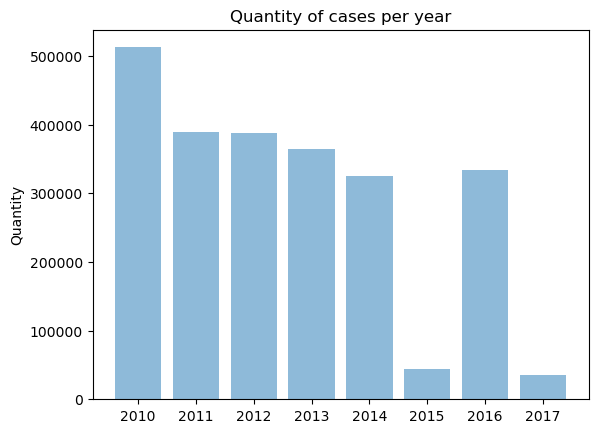

In [10]:
plt.bar(data['ANO_BO'].unique(), data['ANO_BO'].value_counts(), align='center', alpha=0.5)
plt.ylabel('Quantity')
plt.title('Quantity of cases per year')

plt.show()

In [11]:
bool_logradouro = data['LOGRADOURO'].notnull()

data = data[bool_logradouro]

le = preprocessing.LabelEncoder()
data['CAT_LOGRADOURO'] = le.fit_transform(data['LOGRADOURO'])

print (data.shape)
print (data.columns)

(2395019, 31)
Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'CIDADE', 'ANO_BO', 'NUM_BO', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC',
       'DESCR_TIPO_BO', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_COMUNICACAO_BO', 'FLAG_STATUS', 'RUBRICA', 'DESCR_CONDUTA',
       'DESDOBRAMENTO', 'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'DESCR_TIPO_PESSOA',
       'FLAG_VITIMA_FATAL', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CUTIS',
       'CAT_LOGRADOURO'],
      dtype='object')


(2395019, 31)
(91244, 31)


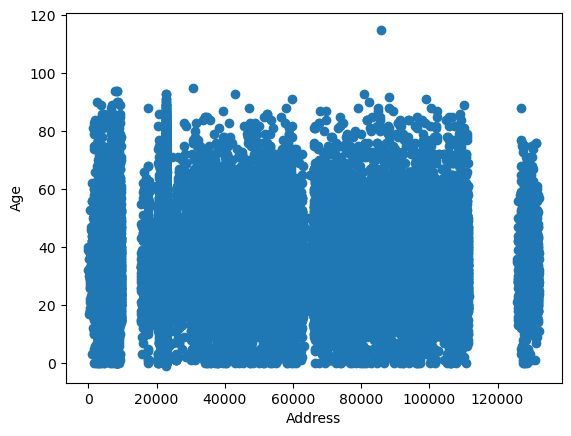

In [12]:
#missing values
data['FLAG_VITIMA_FATAL'].value_counts()

bool_vitimas = data['FLAG_VITIMA_FATAL'].notnull()

vitimas = data[bool_vitimas]

print(data.shape)
print(vitimas.shape)

bool_values = vitimas['IDADE_PESSOA'].notnull()

scatter = vitimas[bool_values]

plt.scatter(scatter['CAT_LOGRADOURO'], scatter['IDADE_PESSOA'])
plt.xlabel('Address')
plt.ylabel('Age')
plt.show()

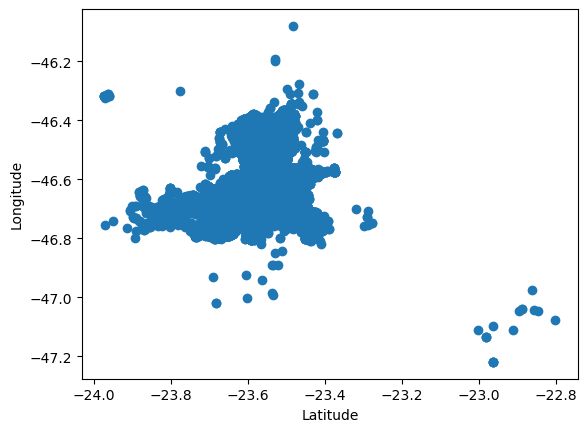

In [13]:
bool_values = vitimas['LATITUDE'].notnull()
scatter = vitimas[bool_values]
bool_values = scatter['LONGITUDE'].notnull()
scatter = scatter[bool_values]

plt.scatter(scatter['LATITUDE'], scatter['LONGITUDE'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

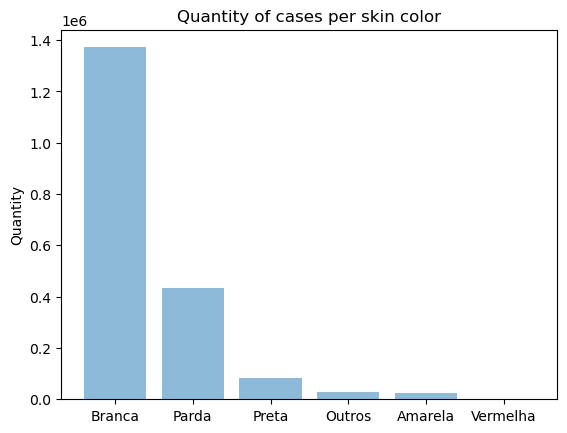

In [14]:
bool_values = data['COR_CUTIS'].notnull()

bar = data[bool_values]
bar = pd.DataFrame(bar['COR_CUTIS'].value_counts())
bar['COR'] = bar.index

plt.bar(bar['COR'], bar['COR_CUTIS'], align='center', alpha=0.5)
plt.ylabel('Quantity')
plt.title('Quantity of cases per skin color')

plt.show()

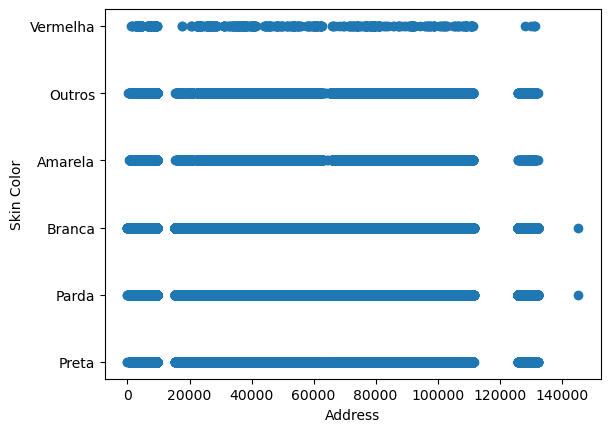

In [15]:
bool_values = data['COR_CUTIS'].notnull()
scatter = data[bool_values]

plt.scatter(scatter['CAT_LOGRADOURO'], scatter['COR_CUTIS'])
plt.xlabel('Address')
plt.ylabel('Skin Color')
plt.show()

In [16]:
print(data['IDADE_PESSOA'].max())
print(data['IDADE_PESSOA'].min())

bool = (data['IDADE_PESSOA'] > 100) | (data['IDADE_PESSOA'] < 10)
data['IDADE_PESSOA'].loc[bool] = np.NaN
data['IDADE_PESSOA'].value_counts()

601.0
-1779.0


C:\Users\monik\AppData\Local\Temp\ipykernel_6388\367282907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IDADE_PESSOA'].loc[bool] = np.NaN


28.0     74387
27.0     74071
29.0     72827
26.0     72515
30.0     72382
         ...  
96.0        32
98.0        15
97.0        15
99.0         9
100.0        5
Name: IDADE_PESSOA, Length: 91, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd50637e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd5064b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd50637b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd5064b9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd5064bc70>],
 'means': []}

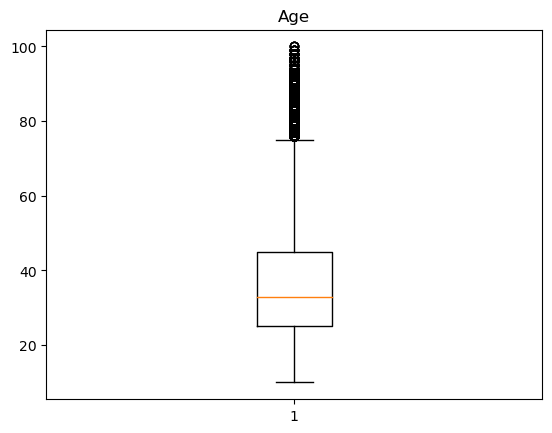

In [17]:
bool_values = data['IDADE_PESSOA'].notnull()

box = data[bool_values]

fig1, ax1 = plt.subplots()
ax1.set_title('Age')
ax1.boxplot(box['IDADE_PESSOA'])

<AxesSubplot:xlabel='COR_CUTIS', ylabel='value'>

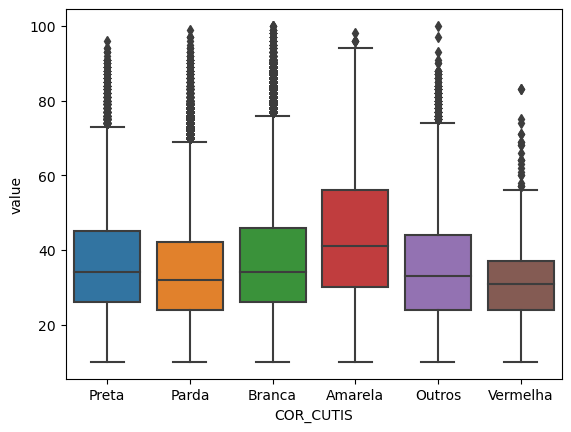

In [18]:
dd=pd.melt(box,id_vars=['COR_CUTIS'],value_vars=['IDADE_PESSOA'])
sns.boxplot(x='COR_CUTIS',y='value',data=dd)

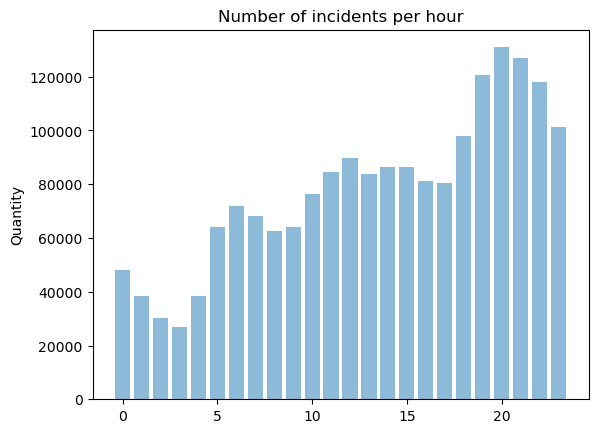

In [19]:
bool_values = data['HORA_OCORRENCIA_BO'].notnull()

bar = data[bool_values]

list = pd.Series.tolist(bar['HORA_OCORRENCIA_BO'])

new_list = []
for item in list:
    new_list.append(item.hour)
    
plot = pd.DataFrame(new_list, columns = ['QTD'])

plot = pd.DataFrame(plot['QTD'].value_counts())

plot['HORA'] = plot.index

plt.bar(plot['HORA'], plot['QTD'], align='center', alpha=0.5)
plt.ylabel('Quantity')
plt.title('Number of incidents per hour')

plt.show()

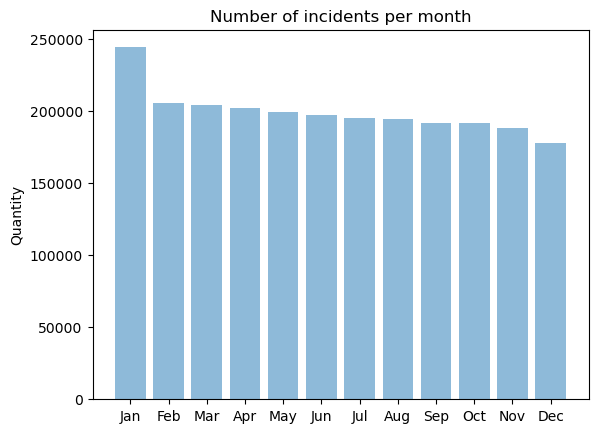

In [20]:
#Quantity per month

bool_values = data['DATA_OCORRENCIA_BO'].notnull()

bar = data[bool_values]

list = pd.Series.tolist(bar['DATA_OCORRENCIA_BO'])

new_list = []
for item in list:
    new_list.append(item.month)
    
plot = pd.DataFrame(new_list, columns = ['QTD'])

plot = pd.DataFrame(plot['QTD'].value_counts())

plot['MES'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(plot['MES'], plot['QTD'], align='center', alpha=0.5)
plt.ylabel('Quantity')
plt.title('Number of incidents per month')

plt.show()

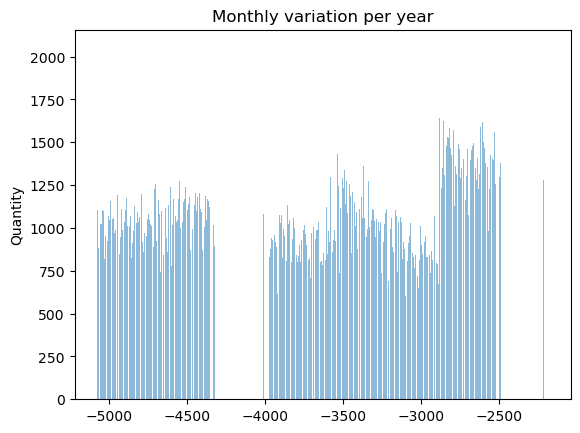

In [21]:
#Monthly variation by year

bool_values = data['DATA_OCORRENCIA_BO'].notnull()

bar = data[bool_values]

bar = pd.DataFrame(bar['DATA_OCORRENCIA_BO'].value_counts())
bar['DATA'] = bar.index
bar['DATA'] = pd.to_datetime(bar['DATA'], errors='coerce')
bar['ATRASO'] = bar['DATA'].apply (lambda x: (x - x.now()).days)

bar.reset_index(drop=True, inplace=True)

plt.bar(bar['ATRASO'], bar['DATA_OCORRENCIA_BO'], align='center', alpha=0.5)
plt.ylabel('Quantity')
plt.title('Monthly variation per year')

plt.show()

In [22]:
data.columns

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'CIDADE', 'ANO_BO', 'NUM_BO', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC',
       'DESCR_TIPO_BO', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_COMUNICACAO_BO', 'FLAG_STATUS', 'RUBRICA', 'DESCR_CONDUTA',
       'DESDOBRAMENTO', 'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'DESCR_TIPO_PESSOA',
       'FLAG_VITIMA_FATAL', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CUTIS',
       'CAT_LOGRADOURO'],
      dtype='object')

* Number of fatal victims by skin color
* Number of fatal victims by hour
* Number of fatal victims by age
* Number of fatal victims by gender
* Number of fatal victims by municipality

# Data mining techniques to train, considering the target variable as flag_vitima_fatal:

* KNN
* Naive Bayes
* Random Forest
* GradientBoostingClassifier

In [23]:
bool_values = data['FLAG_VITIMA_FATAL'].notnull()

vitima = data[bool_values]

print(vitima.shape)
print(vitima['FLAG_VITIMA_FATAL'].value_counts())

(91244, 31)
N    83736
S     7508
Name: FLAG_VITIMA_FATAL, dtype: int64


In [24]:
#dropping useless columns
vitima.drop('ID_DELEGACIA', axis = 1, inplace = True)
vitima.drop('NOME_DEPARTAMENTO', axis = 1, inplace = True)
vitima.drop('NOME_SECCIONAL', axis = 1, inplace = True)
vitima.drop('NOME_DELEGACIA', axis = 1, inplace = True)
vitima.drop('NUM_BO', axis = 1, inplace = True)
vitima.drop('NOME_DEPARTAMENTO_CIRC', axis = 1, inplace = True)
vitima.drop('NOME_MUNICIPIO_CIRC', axis = 1, inplace = True)
vitima.drop('DATAHORA_COMUNICACAO_BO', axis = 1, inplace = True)
vitima.drop('NUMERO_LOGRADOURO', axis = 1, inplace = True)
vitima.drop('CAT_LOGRADOURO', axis = 1, inplace = True)

C:\Users\monik\AppData\Local\Temp\ipykernel_6388\1801148987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitima.drop('ID_DELEGACIA', axis = 1, inplace = True)
C:\Users\monik\AppData\Local\Temp\ipykernel_6388\1801148987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitima.drop('NOME_DEPARTAMENTO', axis = 1, inplace = True)
C:\Users\monik\AppData\Local\Temp\ipykernel_6388\1801148987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [25]:
#one-hot encoding categorical variables

dmCidade = pd.get_dummies(vitima['CIDADE'])
dmNomeSceccional = pd.get_dummies(vitima['NOME_SECCIONAL_CIRC'])
dmNomeDelegacia = pd.get_dummies(vitima['NOME_DELEGACIA_CIRC'])
dmDescBO = pd.get_dummies(vitima['DESCR_TIPO_BO'])
dmRubrica = pd.get_dummies(vitima['RUBRICA'])
dmConduta = pd.get_dummies(vitima['DESCR_CONDUTA'])
dmDesdobramento = pd.get_dummies(vitima['DESDOBRAMENTO'])
dmTipoLocal = pd.get_dummies(vitima['DESCR_TIPOLOCAL'])
dmSubTipoLocal = pd.get_dummies(vitima['DESCR_SUBTIPOLOCAL'])
dmTipoPessoa = pd.get_dummies(vitima['DESCR_TIPO_PESSOA'])
dmSexoPessoa = pd.get_dummies(vitima['SEXO_PESSOA'])
dmCor = pd.get_dummies(vitima['COR_CUTIS'])

In [26]:
print(dmCidade.shape)
print(dmNomeSceccional.shape)
print(dmNomeDelegacia.shape)
print(dmDescBO.shape)
print(dmRubrica.shape)
print(dmConduta.shape)
print(dmDesdobramento.shape)
print(dmTipoLocal.shape)
print(dmSubTipoLocal.shape)
print(dmTipoPessoa.shape)
print(dmSexoPessoa.shape)
print(dmCor.shape)

(91244, 97)
(91244, 8)
(91244, 101)
(91244, 2)
(91244, 33)
(91244, 18)
(91244, 36)
(91244, 30)
(91244, 948)
(91244, 53)
(91244, 5)
(91244, 6)


In [27]:
vitima = pd.concat([vitima, dmCidade, dmNomeSceccional, dmDescBO, dmRubrica, dmConduta, dmDesdobramento, 
                    dmTipoLocal, dmTipoPessoa, dmSexoPessoa, dmCor], axis=1)

In [28]:
vitima.drop('CIDADE', axis = 1, inplace = True)
vitima.drop('NOME_SECCIONAL_CIRC', axis = 1, inplace = True)
vitima.drop('NOME_DELEGACIA_CIRC', axis = 1, inplace = True)
vitima.drop('DESCR_TIPO_BO', axis = 1, inplace = True)
vitima.drop('RUBRICA', axis = 1, inplace = True)
vitima.drop('DESCR_CONDUTA', axis = 1, inplace = True)
vitima.drop('DESDOBRAMENTO', axis = 1, inplace = True)
vitima.drop('DESCR_TIPOLOCAL', axis = 1, inplace = True)
vitima.drop('DESCR_SUBTIPOLOCAL', axis = 1, inplace = True)
vitima.drop('LOGRADOURO', axis = 1, inplace = True)
vitima.drop('DESCR_TIPO_PESSOA', axis = 1, inplace = True)
vitima.drop('SEXO_PESSOA', axis = 1, inplace = True)
vitima.drop('COR_CUTIS', axis = 1, inplace = True)

In [29]:
print(vitima.shape)
vitima.head(5)

(91244, 296)


,ANO_BO,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,LATITUDE,LONGITUDE,FLAG_VITIMA_FATAL,IDADE_PESSOA,ADAMANTINA,AGUAS DE LINDOIA,...,F,I,M,N,Amarela,Branca,Outros,Parda,Preta,Vermelha
240,2010,2010-04-17,05:40:00,Consumado,NaN,NaN,N,42.0,0,0,...,1,0,0,0,0,0,0,1,0,0
312,2010,2010-04-17,05:40:00,Consumado,NaN,NaN,N,24.0,0,0,...,1,0,0,0,0,0,0,1,0,0
607,2010,2010-10-31,04:55:00,Consumado,NaN,NaN,N,22.0,0,0,...,1,0,0,0,0,1,0,0,0,0
949,2010,2010-04-17,05:40:00,Consumado,NaN,NaN,N,47.0,0,0,...,1,0,0,0,0,1,0,0,0,0
1136,2010,2010-11-06,09:30:00,Consumado,NaN,NaN,N,17.0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [30]:
enc = preprocessing.OrdinalEncoder()

vitima['FLAG_STATUS'] = enc.fit_transform(vitima['FLAG_STATUS'].values.reshape(-1, 1))
vitima['FLAG_VITIMA_FATAL'] = enc.fit_transform(vitima['FLAG_VITIMA_FATAL'].values.reshape(-1, 1))

In [31]:
print(vitima['ANO_BO'].isnull().value_counts())
print(vitima['DATA_OCORRENCIA_BO'].isnull().value_counts())
print(vitima['HORA_OCORRENCIA_BO'].isnull().value_counts())
print(vitima['FLAG_STATUS'].isnull().value_counts())
print(vitima['LATITUDE'].isnull().value_counts())
print(vitima['LONGITUDE'].isnull().value_counts())
print(vitima['FLAG_VITIMA_FATAL'].isnull().value_counts())
print(vitima['IDADE_PESSOA'].isnull().value_counts())

False    91244
Name: ANO_BO, dtype: int64
False    91244
Name: DATA_OCORRENCIA_BO, dtype: int64
False    81411
True      9833
Name: HORA_OCORRENCIA_BO, dtype: int64
False    91244
Name: FLAG_STATUS, dtype: int64
True     47291
False    43953
Name: LATITUDE, dtype: int64
True     47291
False    43953
Name: LONGITUDE, dtype: int64
False    91244
Name: FLAG_VITIMA_FATAL, dtype: int64
False    88169
True      3075
Name: IDADE_PESSOA, dtype: int64


In [32]:
bool_values = vitima['HORA_OCORRENCIA_BO'].notnull()

vitima = vitima[bool_values]

bool_values = vitima['LATITUDE'].notnull()

vitima = vitima[bool_values]

bool_values = vitima['IDADE_PESSOA'].notnull()

vitima = vitima[bool_values]

In [33]:
vitima.reset_index(inplace=True, drop = True)

list = pd.Series.tolist(vitima['DATA_OCORRENCIA_BO'])

months = []
days = []
for item in list:
    months.append(item.month)
    days.append(item.day)

list = pd.Series.tolist(vitima['HORA_OCORRENCIA_BO'])

hours = []
for item in list:
    hours.append(item.hour)

d = {'MES': months, 'DIA': days, 'HORA': hours}
df = pd.DataFrame(d)

vitima = pd.concat([vitima,df], axis = 1, sort=False)

vitima.drop('DATA_OCORRENCIA_BO', axis = 1, inplace = True)
vitima.drop('HORA_OCORRENCIA_BO', axis = 1, inplace = True)

In [34]:
print(vitima.columns)
vitima['FLAG_VITIMA_FATAL'].value_counts()

Index(['ANO_BO', 'FLAG_STATUS', 'LATITUDE', 'LONGITUDE', 'FLAG_VITIMA_FATAL',
       'IDADE_PESSOA', 'ADAMANTINA                              ',
       'AGUAS DE LINDOIA                        ',
       'AGUAS DE SANTA BARBARA                  ',
       'ALVINLANDIA                             ',
       ...
       'N', 'Amarela', 'Branca', 'Outros', 'Parda', 'Preta', 'Vermelha', 'MES',
       'DIA', 'HORA'],
      dtype='object', length=297)


0.0    33177
1.0     5122
Name: FLAG_VITIMA_FATAL, dtype: int64

In [35]:
y = vitima['FLAG_VITIMA_FATAL']
X = vitima.drop('FLAG_VITIMA_FATAL', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [36]:
#Downsampling majority class

train = pd.concat([X_train, y_train], axis = 1)

vitima_majority = train[train['FLAG_VITIMA_FATAL']==0]
vitima_minority = train[train['FLAG_VITIMA_FATAL']==1]


vitima_majority_downsampled = resample(vitima_majority, replace=False, n_samples=3581, random_state=100)
 
vitima_downsampled = pd.concat([vitima_majority_downsampled, vitima_minority])
 
print(vitima_downsampled['FLAG_VITIMA_FATAL'].value_counts())

y_train = vitima_downsampled['FLAG_VITIMA_FATAL']
X_train = vitima_downsampled.drop('FLAG_VITIMA_FATAL', axis = 1)

0.0    3581
1.0    3581
Name: FLAG_VITIMA_FATAL, dtype: int64


In [37]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators =100, random_state = 100)

rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
print("     Predito")
print("Real", cm[0][0], cm[0][1])
print("     ", cm[1][0], cm[1][1])
#false negative rate (FNR)
print("False Negative Rate:",cm[1][0]/(cm[1][0]+cm[1][1]))

Random Forest Accuracy: 0.9625761531766753
     Predito
Real 9539 410
      20 1521
False Negative Rate: 0.012978585334198572


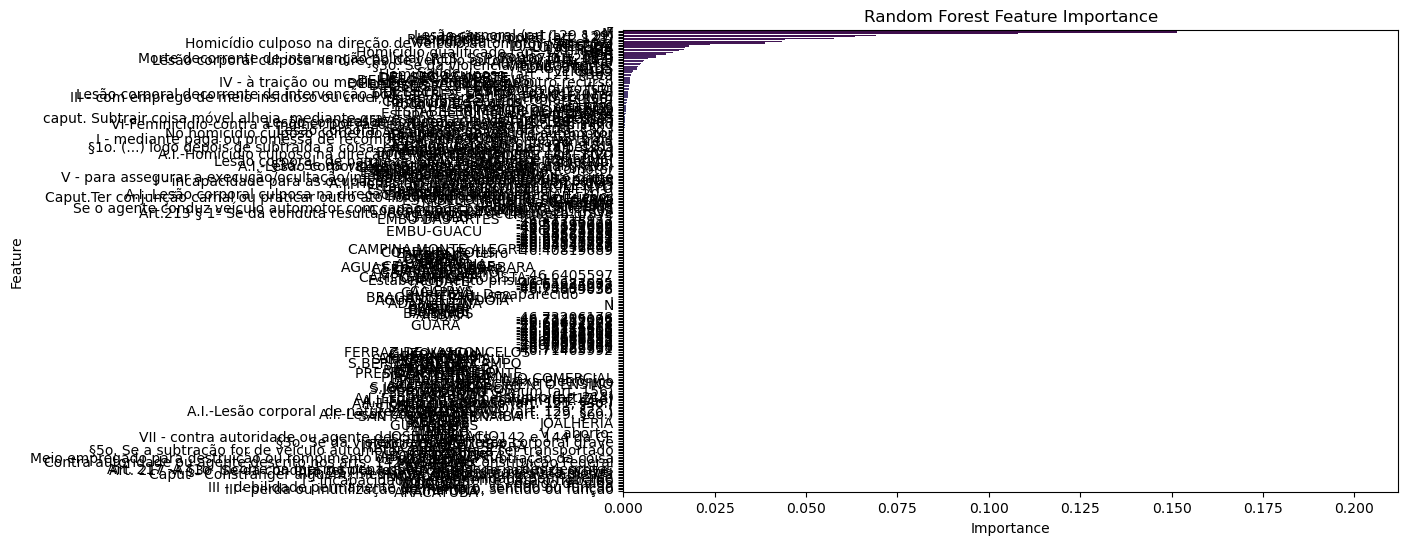

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_model is your trained Random Forest model
feature_importance = rf_model.feature_importances_
feature_names = X.columns  # Assuming X is your feature matrix

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

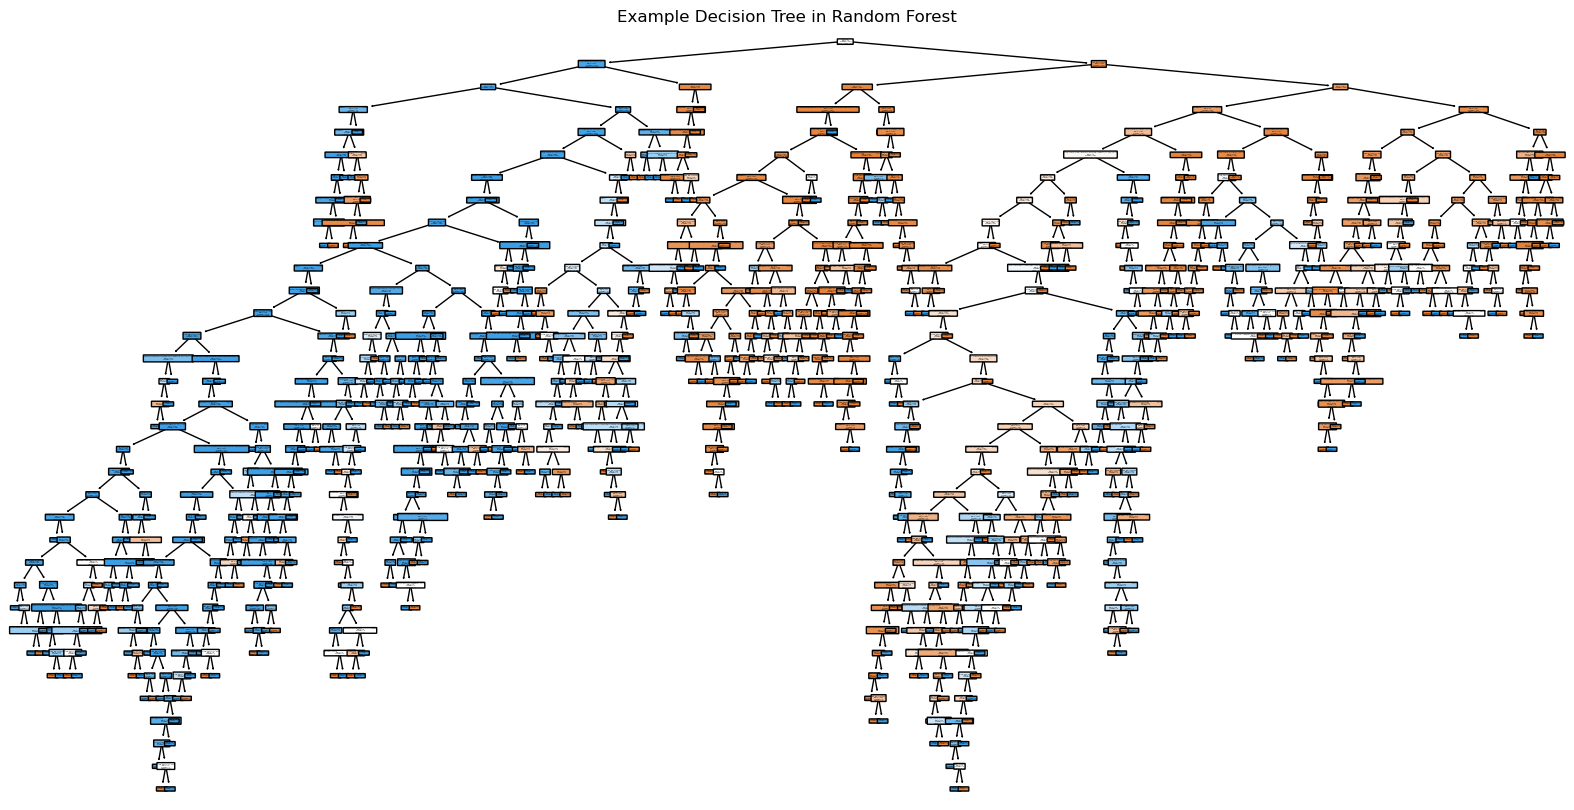

In [39]:
from sklearn.tree import plot_tree

# Assuming rf_model is your trained Random Forest model
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_names, filled=True, rounded=True)
plt.title('Example Decision Tree in Random Forest')
plt.show()

# Confusion Matrix

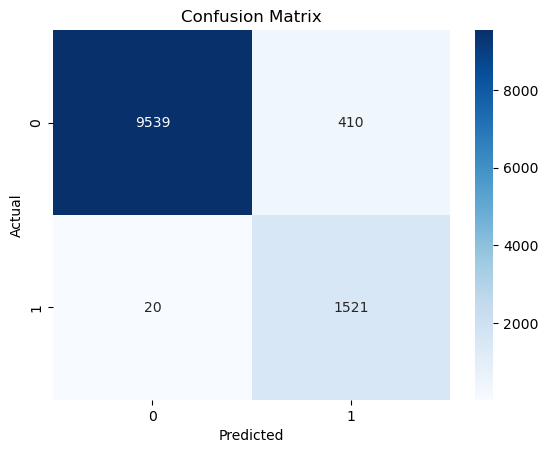

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=100)

knn_model.fit(X_train,y_train)

y_pred = knn_model.predict(X_test)
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
print("     Predito")
print("Real", cm[0][0], cm[0][1])
print("     ", cm[1][0], cm[1][1])
#false negative rate (FNR)
print("False Negative Rate:",cm[1][0]/(cm[1][0]+cm[1][1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


kNN Accuracy: 0.7059181897302002
     Predito
Real 7015 2934
      445 1096
False Negative Rate: 0.28877352368591824


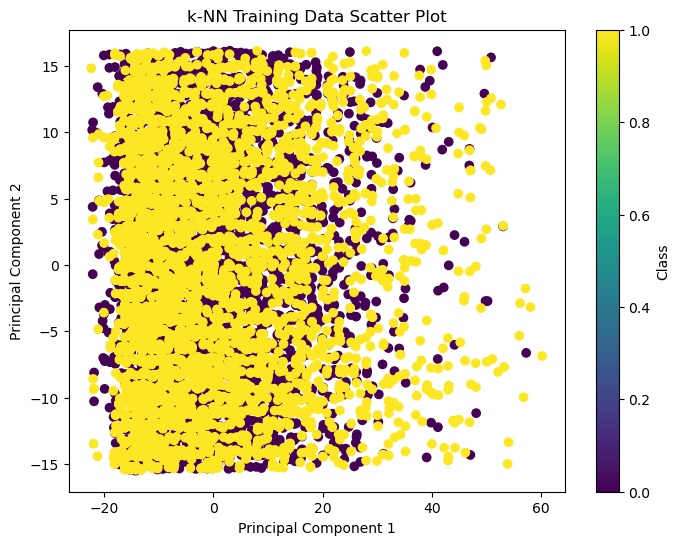

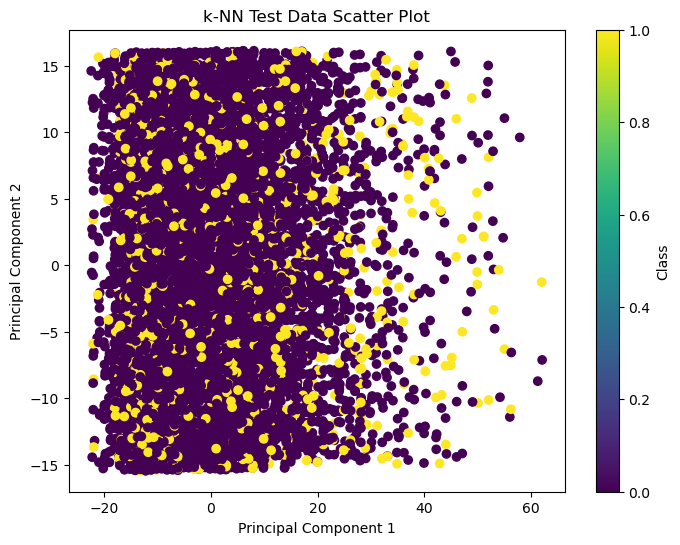

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_pca and X_test_pca are the reduced dimensionality versions of your data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Assuming y_train and y_test are the corresponding labels

# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('k-NN Training Data Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.title('k-NN Test Data Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# Confusion Matrix

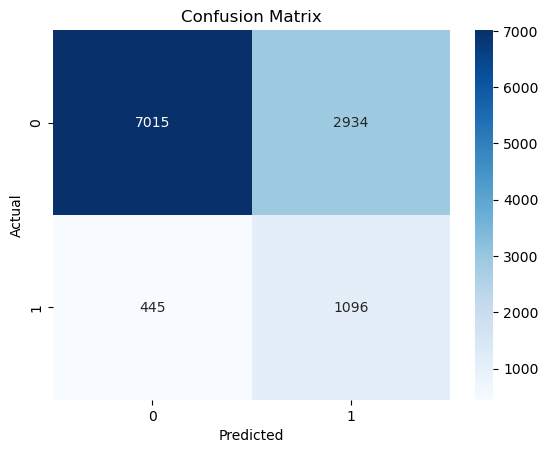

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
print("     Predito")
print("Real", cm[0][0], cm[0][1])
print("     ", cm[1][0], cm[1][1])
#false negative rate (FNR)
print("False Negative Rate:",cm[1][0]/(cm[1][0]+cm[1][1]))

Naive Bayes Accuracy: 0.9260226283724978
     Predito
Real 9763 186
      664 877
False Negative Rate: 0.4308890330953926


# Confusion matrix

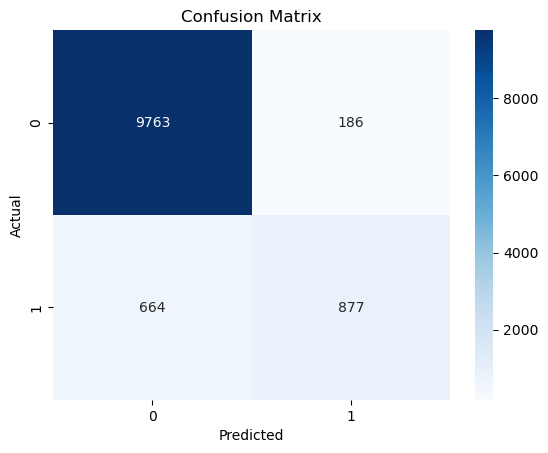

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
gb_accuracy = metrics.accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=[0, 1])
print("     Predito")
print("Real", cm_gb[0][0], cm_gb[0][1])
print("     ", cm_gb[1][0], cm_gb[1][1])

# False Negative Rate (FNR)
fnr_gb = cm_gb[1][0] / (cm_gb[1][0] + cm_gb[1][1])
print("False Negative Rate:", fnr_gb)

Gradient Boosting Accuracy: 0.9678851174934726
     Predito
Real 9614 335
      34 1507
False Negative Rate: 0.022063595068137574


# confusion matrix

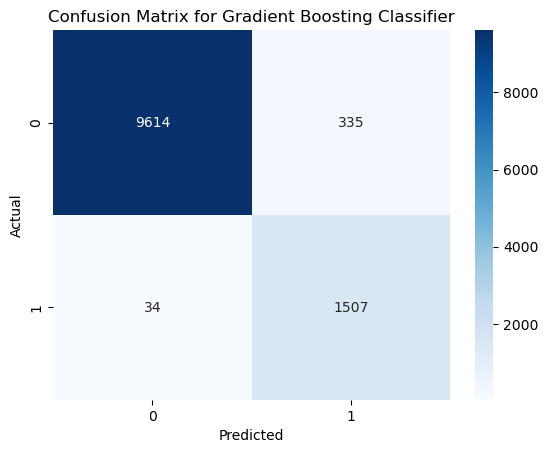

In [47]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=[0, 1])

# Create heatmap
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Accuracy: Random Forest and Gradient Boosting have similar accuracies, both above 96%. Naive Bayes has a slightly lower accuracy, while kNN has the lowest accuracy.

# False Negative Rate: Random Forest has the lowest false negative rate, suggesting it is better at identifying positive cases (assuming a binary classification problem where "Fatal" is a positive case). Gradient Boosting also performs well, but Naive Bayes and kNN have higher false negative rates.


# In conclusion, after evaluating multiple machine learning models for crime prediction, the Random Forest algorithm demonstrated superior performance in terms of both overall accuracy and the critical metric of minimizing false negatives. With an accuracy of 96.26% and a remarkably low false negative rate of 1.30%, Random Forest outperformed Gradient Boosting, Naive Bayes, and kNN in identifying cases of fatal incidents accurately. This suggests that Random Forest is the most suitable model for predicting and preventing serious crimes. Considering its robust performance, Random Forest stands out as the preferred model for future use, offering a reliable and effective solution for crime prediction tasks.